# Plotting MCWD versus MAP

This type of plot is presented and explained in Malhi et al. (2009). It includes maximum climatological water deficit (MCWD) and mean annual precipitation (MAP). We have included a function in obrero that will help us plot such a graph. For this function to work we need the resulting table from the function `mcwd_composite_map()` in the module `obrero.experimental.mcwd`. Let's import obrero and the experimental module:

In [1]:
# small hack to be able to import module without install
import os
import sys
sys.path.append(os.getcwd() + '/../')

import obrero
from obrero.experimental import mcwd

Now we read data from two experiment simulations:

In [3]:
# file name
f1 = 'data/ctl_pr_evap.nc'
f2 = 'data/pen_pr_evap.nc'
f3 = 'data/ctl_evapmean.nc'

# read as data array (ignore warnings because netCDF files are weird)
da1 = obrero.read_nc(f1, 'pr')
da2 = obrero.read_nc(f2, 'pr')
ev = obrero.read_nc(f3, 'evap')

And repeat the same steps from previous examples to get the composite values and table:

In [4]:
# sum monthly values to get yearly
map1 = da1.groupby('time.year').sum(dim='time', keep_attrs=True)
map2 = da2.groupby('time.year').sum(dim='time', keep_attrs=True)

# rename time
map1 = map1.rename({'year': 'time'})
map2 = map2.rename({'year': 'time'})

# compute mcwd
wd1 = mcwd.get_mcwd(da1, ev)
wd2 = mcwd.get_mcwd(da2, ev)

# composite
composite, table = mcwd.mcwd_composite_map(wd2, map2, wd1, map1)

And now we use the function `plot_malhi()` to plot the values in the `table` data frame in our very own way:

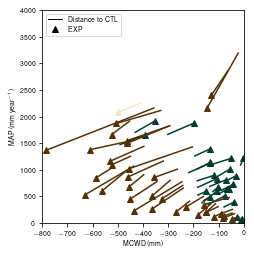

In [6]:
%matplotlib inline
ax = mcwd.plot_malhi(table)

For more explanation about this plot see Duque et al. (2019).

## References

Duque et al. (2019)

Malhi, Y., Aragão, L. E., Galbraith, D., Huntingford, C., Fisher, R., Zelazowski, P., ... & Meir, P. (2009). Exploring the likelihood and mechanism of a climate-change-induced dieback of the Amazon rainforest. Proceedings of the National Academy of Sciences, 106(49), 20610-20615.